In [12]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import pandas_profiling
import cufflinks as cf
cf.set_config_file(offline=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [13]:
df = pd.read_csv('hariyana-steelers.csv',index_col=0)

In [14]:
df.head()

,OVERALL,SEASON 7,SEASON 6,SEASON 5,Team-name
SEASONS,,,,,
MATCHES PLAYED,62.0,18.0,22.0,22.0,haryana-steelers
WINS,14.0,3.0,5.0,6.0,haryana-steelers
DRAWS,9.0,3.0,4.0,2.0,haryana-steelers
LOSSES,39.0,12.0,13.0,14.0,haryana-steelers
FINISHING POSITION,0.0,12.0,6.0,6.0,haryana-steelers


In [15]:
df1 = df.transpose()

In [16]:
df2 = df1.apply(pd.to_numeric, errors='coerce')

In [17]:
df2

SEASONS,MATCHES PLAYED,WINS,DRAWS,LOSSES,FINISHING POSITION,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,...,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS
OVERALL,62.0,14.0,9.0,39.0,0.0,2697.0,943.0,623.0,1131.0,0.42,...,280.0,1142.0,1415.0,502.0,913.0,0.39,45.0,52.0,104.0,545.0
SEASON 7,18.0,3.0,3.0,12.0,12.0,750.0,248.0,194.0,308.0,0.42,...,74.0,313.0,400.0,144.0,256.0,0.39,13.0,13.0,26.0,155.0
SEASON 6,22.0,5.0,4.0,13.0,6.0,925.0,344.0,222.0,359.0,0.45,...,105.0,419.0,498.0,174.0,324.0,0.38,15.0,20.0,40.0,189.0
SEASON 5,22.0,6.0,2.0,14.0,6.0,1022.0,351.0,207.0,464.0,0.40,...,101.0,410.0,517.0,184.0,333.0,0.39,17.0,19.0,38.0,201.0
Team-name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df2['WIN%'] = df2['WINS']/df2['MATCHES PLAYED']
df2['DRAW%'] = df2['DRAWS']/df2['MATCHES PLAYED']
df2['LOSS%'] = df2['LOSSES']/df2['MATCHES PLAYED']
df2['WIN-LOSS%'] = df2['WINS']/df2['LOSSES']


In [19]:
df2.dtypes

SEASONS
MATCHES PLAYED          float64
WINS                    float64
DRAWS                   float64
LOSSES                  float64
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESSFUL RAIDS        float64
UNSUCCESSFUL RAID       float64
EMPTY RAIDS             float64
SUCCESS RAID %          float64
NO. OF SUPER RAIDS      float64
RAID TOUCH POINTS       float64
RAID BONUS POINTS       float64
TOTAL RAID POINTS       float64
TOTAL TACKLES           float64
SUCCESSFUL TACKLES      float64
UNSUCCESFUL TACKLES     float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
ALL OUTS INFLICTED      float64
TOTAL ALL OUT POINTS    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
WIN-LOSS%               float64
dtype: object

In [20]:
df2['UNSUCCESSFUL RAID%'] = df2['UNSUCCESSFUL RAID']/df2['TOTAL RAIDS']
df2['EMPTY RAID%'] = df2['EMPTY RAIDS']/df2['TOTAL RAIDS']
df2['AVG_RAID_TOUCH_POINT'] = df2['RAID TOUCH POINTS']/df2['MATCHES PLAYED']
df2['AVG_RAID_BONUS_POINT'] = df2['RAID BONUS POINTS']/df2['MATCHES PLAYED']
df2['UNSUCCESSFUL TACKLE%'] = df2['UNSUCCESFUL TACKLES']/df2['TOTAL TACKLES']
df2['AVG_ALL_OUTS'] = df2['ALL OUTS INFLICTED']/df2['MATCHES PLAYED']

In [21]:
df6 = df2.drop(['MATCHES PLAYED','WINS','DRAWS','LOSSES','SUCCESSFUL RAIDS','UNSUCCESSFUL RAID','EMPTY RAIDS','NO. OF SUPER RAIDS','RAID TOUCH POINTS','RAID BONUS POINTS','TOTAL RAID POINTS','TOTAL TACKLES','SUCCESSFUL TACKLES','UNSUCCESFUL TACKLES','ALL OUTS INFLICTED','TOTAL ALL OUT POINTS'],axis=1)

In [22]:
df6 = df6.drop(['Team-name'],axis=0)
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,0.0,2697.0,0.42,0.39,45.0,545.0,0.225806,0.145161,0.629032,0.358974,0.230997,0.419355,13.903226,4.516129,0.645230,0.838710
SEASON 7,12.0,750.0,0.42,0.39,13.0,155.0,0.166667,0.166667,0.666667,0.250000,0.258667,0.410667,13.277778,4.111111,0.640000,0.722222
SEASON 6,6.0,925.0,0.45,0.38,15.0,189.0,0.227273,0.181818,0.590909,0.384615,0.240000,0.388108,14.272727,4.772727,0.650602,0.909091
SEASON 5,6.0,1022.0,0.40,0.39,17.0,201.0,0.272727,0.090909,0.636364,0.428571,0.202544,0.454012,14.045455,4.590909,0.644101,0.863636


In [23]:
df6.dtypes

SEASONS
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESS RAID %          float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
WIN-LOSS%               float64
UNSUCCESSFUL RAID%      float64
EMPTY RAID%             float64
AVG_RAID_TOUCH_POINT    float64
AVG_RAID_BONUS_POINT    float64
UNSUCCESSFUL TACKLE%    float64
AVG_ALL_OUTS            float64
dtype: object

In [24]:
df6.corr().iplot(kind='heatmap',colorscale='ylgn')

In [25]:
df3= df2.loc['SEASON 5',:]

In [26]:
df3 

SEASONS
MATCHES PLAYED            22.000000
WINS                       6.000000
DRAWS                      2.000000
LOSSES                    14.000000
FINISHING POSITION         6.000000
TOTAL RAIDS             1022.000000
SUCCESSFUL RAIDS         351.000000
UNSUCCESSFUL RAID        207.000000
EMPTY RAIDS              464.000000
SUCCESS RAID %             0.400000
NO. OF SUPER RAIDS         5.000000
RAID TOUCH POINTS        309.000000
RAID BONUS POINTS        101.000000
TOTAL RAID POINTS        410.000000
TOTAL TACKLES            517.000000
SUCCESSFUL TACKLES       184.000000
UNSUCCESFUL TACKLES      333.000000
SUCCESSFUL TACKLE %        0.390000
NO. OF SUPER TACKLES      17.000000
ALL OUTS INFLICTED        19.000000
TOTAL ALL OUT POINTS      38.000000
TOTAL DEFENCE POINTS     201.000000
WIN%                       0.272727
DRAW%                      0.090909
LOSS%                      0.636364
WIN-LOSS%                  0.428571
UNSUCCESSFUL RAID%         0.202544
EMPTY RAID%         

In [27]:
df3.iplot(kind='bar')

In [28]:
df4 =df6.drop('FINISHING POSITION',axis=1)
df4 =df4.drop(['SEASON 7'])
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,2697.0,0.42,0.39,45.0,545.0,0.225806,0.145161,0.629032,0.358974,0.230997,0.419355,13.903226,4.516129,0.645230,0.838710
SEASON 6,925.0,0.45,0.38,15.0,189.0,0.227273,0.181818,0.590909,0.384615,0.240000,0.388108,14.272727,4.772727,0.650602,0.909091
SEASON 5,1022.0,0.40,0.39,17.0,201.0,0.272727,0.090909,0.636364,0.428571,0.202544,0.454012,14.045455,4.590909,0.644101,0.863636


In [29]:
df5 = df6['FINISHING POSITION']
df5 = df5.drop(['SEASON 7'],axis=0)
#df5['FINISHING POSITION'] = df['FINISHING POSITION'].fillna(0)
df5

OVERALL     0.0
SEASON 6    6.0
SEASON 5    6.0
Name: FINISHING POSITION, dtype: float64

In [30]:
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,2697.0,0.42,0.39,45.0,545.0,0.225806,0.145161,0.629032,0.358974,0.230997,0.419355,13.903226,4.516129,0.645230,0.838710
SEASON 6,925.0,0.45,0.38,15.0,189.0,0.227273,0.181818,0.590909,0.384615,0.240000,0.388108,14.272727,4.772727,0.650602,0.909091
SEASON 5,1022.0,0.40,0.39,17.0,201.0,0.272727,0.090909,0.636364,0.428571,0.202544,0.454012,14.045455,4.590909,0.644101,0.863636


In [31]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X = df4
y= df5
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape


(3, 4)

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['FEATURES','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

                FEATURES        Score
0            TOTAL RAIDS  1279.264535
4   TOTAL DEFENCE POINTS   262.032086
3   NO. OF SUPER TACKLES    21.844156
12  AVG_RAID_BONUS_POINT     0.003956
8              WIN-LOSS%     0.003869


D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[0.1   0.025 0.025 0.2   0.2   0.    0.    0.    0.1   0.    0.    0.1
 0.1   0.075 0.075]


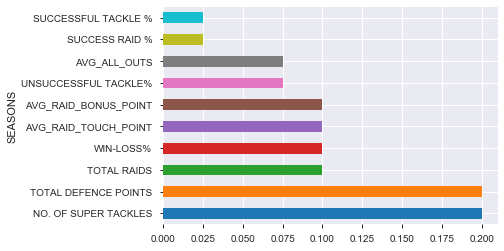

In [33]:
#Feature Importance 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [34]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['TOTAL RAIDS', 'SUCCESS RAID %', 'NO. OF SUPER TACKLES',
       'TOTAL DEFENCE POINTS', 'WIN%', 'DRAW%', 'LOSS%', 'WIN-LOSS%',
       'EMPTY RAID%', 'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT',
       'AVG_ALL_OUTS'],
      dtype='object')


In [35]:
X_features = df4.filter(['TOTAL RAIDS', 'SUCCESS RAID %', 'NO. OF SUPER TACKLES',
       'TOTAL DEFENCE POINTS', 'WIN%', 'DRAW%', 'LOSS%', 'WIN-LOSS%',
       'EMPTY RAID%', 'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT',
       'AVG_ALL_OUTS'],axis=1)
X_features.shape

(3, 12)

In [36]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks


Using Theano backend.



You can find the C code in this temporary file: C:\Users\ANINDA~1.BHA\AppData\Local\Temp\theano_compilation_error_a4aycjln


Exception: Compilation failed (return status=1): C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccAFve63.o: In function `_import_array':. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1470: undefined reference to `__imp_PyExc_ImportError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1476: undefined reference to `__imp_PyExc_AttributeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1481: undefined reference to `__imp_PyCapsule_Type'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1482: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1497: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1505: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1511: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1521: undefined reference to `__imp_PyExc_RuntimeError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccAFve63.o:D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1533: more undefined references to `__imp_PyExc_RuntimeError' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccAFve63.o: In function `NpyCapsule_Check':. D:/anaconda/lib/site-packages/numpy/core/include/numpy/npy_3kcompat.h:468: undefined reference to `__imp_PyCapsule_Type'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccAFve63.o: In function `unpack_list_of_ssize_t':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:48: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:58: undefined reference to `__imp_PyExc_IndexError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccAFve63.o: In function `CLazyLinker_init':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:352: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:370: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:385: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:389: undefined reference to `__imp_PyExc_IndexError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccAFve63.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:393: more undefined references to `__imp_PyExc_IndexError' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccAFve63.o: In function `CLazyLinker_init':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:405: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:420: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:426: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:440: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:444: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccAFve63.o: In function `c_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:546: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccAFve63.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:546: more undefined references to `__imp__Py_NoneStruct' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccAFve63.o: In function `lazy_rec_eval':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:618: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:641: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:649: undefined reference to `__imp_PyExc_ValueError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:657: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:708: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:715: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:721: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:771: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:771: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:772: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccAFve63.o: In function `CLazyLinker_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:814: undefined reference to `__imp_PyExc_RuntimeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:826: undefined reference to `__imp_PyExc_RuntimeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:839: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:839: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:840: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:849: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:849: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccAFve63.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:850: more undefined references to `__imp__Py_NoneStruct' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccAFve63.o: In function `CLazyLinker_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:894: undefined reference to `__imp_PyExc_AssertionError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:937: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:937: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:938: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccAFve63.o: In function `CLazyLinker_set_allow_gc':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:973: undefined reference to `__imp_PyBool_Type'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:976: undefined reference to `__imp__Py_TrueStruct'. collect2.exe: error: ld returned 1 exit status. 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_features, y, epochs=150, batch_size=10)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_features, y)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
f_select =['TOTAL RAIDS', 'SUCCESS RAID %', 'NO. OF SUPER TACKLES',
       'TOTAL DEFENCE POINTS', 'WIN%', 'DRAW%', 'LOSS%', 'WIN-LOSS%',
       'EMPTY RAID%', 'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT',
       'AVG_ALL_OUTS']
f_select

In [ ]:
#Using PCA to transform and decouple the dataset defined by the selected features
from sklearn.decomposition import PCA
pca = PCA()  
XX = pca.fit_transform(X[f_select]) # XX is out new training matrix that has two basis vectors
XX

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
df6

In [37]:
X_train = X
y_train =y 
X_test = df6.drop(['SEASON 6','SEASON 5','OVERALL'],axis=0)
X_test = X_test.drop(['FINISHING POSITION'], axis=1)
y_test = df6['FINISHING POSITION']
y_test = y_test.drop(['SEASON 6','SEASON 5','OVERALL'],axis=0)

In [38]:
X_test

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
SEASON 7,750.0,0.42,0.39,13.0,155.0,0.166667,0.166667,0.666667,0.25,0.258667,0.410667,13.277778,4.111111,0.64,0.722222


In [39]:
y_test

SEASON 7    12.0
Name: FINISHING POSITION, dtype: float64

In [40]:
# machine learning
from sklearn.svm import SVC
from sklearn import preprocessing
#import fancyimpute
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#  Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Models
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [41]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) # Change verbose to True if you want to see it train

[16:36:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.20031	validation_1-rmse:11.1333
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:3.92059	validation_1-rmse:10.7911
[2]	validation_0-rmse:3.65951	validation_1-rmse:10.4717
[3]	validation_0-rmse:3.41582	validation_1-rmse:10.1736
[4]	validation_0-rmse:3.18838	validation_1-rmse:9.89535
[5]	validation_0-rmse:2.97608	validation_1-rmse:9.63566
[6]	validation_0-rmse:2.77793	validation_1-rmse:9.39328
[7]	validation_0-rmse:2.59298	validation_1-rmse:9.16706
[8]	validation_0-rmse:2.42035	validation_1-rmse:8.95593
[9]	validation_0-rmse:2.25922	validation_1-rmse:8.75887
[10]	validation_0-rmse:2.10883	validation_1-rmse:8.57494
[11]	validation_0-rmse:1.96846	validation_1-rmse:8.40328
[12

D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[73]	validation_0-rmse:0.027992	validation_1-rmse:6.03335
[74]	validation_0-rmse:0.026151	validation_1-rmse:6.03113
[75]	validation_0-rmse:0.024431	validation_1-rmse:6.02905
[76]	validation_0-rmse:0.022826	validation_1-rmse:6.02711
[77]	validation_0-rmse:0.021327	validation_1-rmse:6.02531
[78]	validation_0-rmse:0.019927	validation_1-rmse:6.02362
[79]	validation_0-rmse:0.01862	validation_1-rmse:6.02205
[80]	validation_0-rmse:0.017399	validation_1-rmse:6.02058
[81]	validation_0-rmse:0.016259	validation_1-rmse:6.0192
[82]	validation_0-rmse:0.015194	validation_1-rmse:6.01792
[83]	validation_0-rmse:0.0142	validation_1-rmse:6.01673
[84]	validation_0-rmse:0.013271	validation_1-rmse:6.01561
[85]	validation_0-rmse:0.012403	validation_1-rmse:6.01457
[86]	validation_0-rmse:0.011593	validation_1-rmse:6.0136
[87]	validation_0-rmse:0.010836	validation_1-rmse:6.01269
[88]	validation_0-rmse:0.010129	validation_1-rmse:6.01185
[89]	validation_0-rmse:0.009469	validation_1-rmse:6.01106
[90]	validation_0-r

[213]	validation_0-rmse:0.000712	validation_1-rmse:6.00051
[214]	validation_0-rmse:0.000712	validation_1-rmse:6.00051
[215]	validation_0-rmse:0.000712	validation_1-rmse:6.00051
[216]	validation_0-rmse:0.000712	validation_1-rmse:6.00051
[217]	validation_0-rmse:0.000712	validation_1-rmse:6.00051
[218]	validation_0-rmse:0.000712	validation_1-rmse:6.00051
[219]	validation_0-rmse:0.000712	validation_1-rmse:6.00051
[220]	validation_0-rmse:0.000712	validation_1-rmse:6.00051
[221]	validation_0-rmse:0.000713	validation_1-rmse:6.00051
[222]	validation_0-rmse:0.000713	validation_1-rmse:6.00051
[223]	validation_0-rmse:0.000713	validation_1-rmse:6.00051
[224]	validation_0-rmse:0.000713	validation_1-rmse:6.00051
[225]	validation_0-rmse:0.000713	validation_1-rmse:6.00051
[226]	validation_0-rmse:0.000713	validation_1-rmse:6.00051
[227]	validation_0-rmse:0.000713	validation_1-rmse:6.00051
[228]	validation_0-rmse:0.000713	validation_1-rmse:6.00051
[229]	validation_0-rmse:0.000713	validation_1-rmse:6.000

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [42]:
pred  = pd.DataFrame()
pred['MW_Prediction'] = reg.predict(X_test)


In [43]:
pred['MW_Prediction']

0    5.999495
Name: MW_Prediction, dtype: float32

In [44]:
predict = reg.predict(X_test)
predictions = [round(value) for value in predict]
predictions

[6.0]

## Finding the win-loss% of a team for Season 7


In [45]:
df6.loc['SEASON 7','WIN-LOSS%']

0.25

## Finding the successful Raid %(successful raid/ total raid) for season 7

In [46]:
SUCC_RAID =df2.loc['SEASON 7','SUCCESSFUL RAIDS']
TOT_RAID = df2.loc['SEASON 7','TOTAL RAIDS']

SUCC_RAID_PERC = SUCC_RAID/TOT_RAID
SUCC_RAID_PERC

0.33066666666666666

## Finding the OVERALL successful Raid %(successful raid/ total raid) of a team

In [47]:
SUCC_RAID_OV =df2.loc['OVERALL','SUCCESSFUL RAIDS']
TOT_RAID_OV = df2.loc['OVERALL','TOTAL RAIDS']

SUCC_RAID_PERC_OV = SUCC_RAID_OV/TOT_RAID_OV
SUCC_RAID_PERC_OV

0.3496477567667779

## Finding the Super-performance total of the team

In [48]:
SUPER_RAIDS = df2.loc['SEASON 7','NO. OF SUPER RAIDS']
SUPER_TACKLES = df2.loc['SEASON 7','NO. OF SUPER TACKLES']
All_OUTS_INFLICTED = df2.loc['SEASON 7','ALL OUTS INFLICTED']
All_OUTS_CONCEDED = 20

SPT = SUPER_RAIDS+SUPER_TACKLES+All_OUTS_INFLICTED-All_OUTS_CONCEDED
SPT

10.0